In [1]:
#load libraries
import lib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import LinearSVC

In [25]:
def plot_lines(X,y,W):
    fig, sub = plt.subplots(1,1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    ax= sub
    for w in W:
        # # Set-up 2x2 grid for plotting.


        X0, X1 = X[:,0], X[:,1]
        xx, yy = lib.make_meshgrid(X0, X1)

        # # ###########################################################################

        a = -w[0] / w[1]
        XX = np.linspace(-5, 5)
        YY = a * XX - w[2] / w[1]
        ax.plot(XX, YY, "-")
        # # ###########################################################################
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
def plot_lines_local(X,y,w):
    fig, sub = plt.subplots(1,1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    ax= sub
    # # Set-up 2x2 grid for plotting.


    X0, X1 = X[:,0], X[:,1]
    xx, yy = lib.make_meshgrid(X0, X1)

    # # ###########################################################################

    a = -w[0] / w[1]
    XX = np.linspace(-5, 5)
    YY = a * XX - w[2] / w[1]
    ax.plot(XX, YY, "-")
    # # ###########################################################################
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
def plotting_funciton(X,y,w):
    
    # # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(1,1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    ax= sub

    X0, X1 = X[:,0], X[:,1]
    xx, yy = lib.make_meshgrid(X0, X1)

    # # ###########################################################################

    a = -w[0] / w[1]
    XX = np.linspace(-5, 5)
    YY = a * XX - w[2] / w[1]
    ax.plot(XX, YY, "-")
    # # ###########################################################################

    # for clf, title, ax in zip(models, titles, sub.flatten()):
    lib.plot_contours(ax, svm, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('0')
    ax.set_ylabel('1')
    ax.set_xticks(())
    ax.set_yticks(())
    # ax.set_title(title)

    plt.show()
    
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [28]:
def division(X,y,w):
    a = -w[0] / w[1]
    Xsvm = a * X[:,0] - w[2] / w[1]
    div = np.copy(y)
    div.fill(0)
    div[X[:,1]>Xsvm] = 1
    div = np.transpose(np.reshape(div,(-1,1)))
    return div

def smallify_dataset(X,y,sep):
#     print(sep)
    y_left = y[sep==0]
    X_left = X[sep==0]
    y_right = y[sep==1]
    X_right = X[sep==1]
    return X_left, y_left,  X_right,  y_right

#caluculate nearest neighbors
def find_nn(X,y,n_neighbors=50,n_most_different=50):
    if len(y)<n_neighbors:
        n_neighbors = len(y)
    if len(y)<n_most_different:
        n_most_different = len(y)
        
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    ys = y[indices]
    Xs = X[indices]
    most_different_nn = np.argsort(-np.var(ys,1))[:n_most_different]
    most_different_var = -np.sort(-np.var(ys,1))[:n_most_different]
    return Xs[most_different_nn],ys[most_different_nn],most_different_var

def find_proper_svm(X,y):
    Xs,ys,var = find_nn(X,y)
    combined_score = []
    clf = LinearSVC(random_state=0, tol=1e-5)
    for i in range(len(ys)):
        if np.std(ys[i]):
            clf.fit(Xs[i], ys[i])
#         print(f'{clf.score(Xs[i],ys[i])} {clf.score(X,y)}')
#         plotting_funciton(clf,X,y)
            combined_score.append(clf.score(Xs[i], ys[i])*var[i])
    am = np.argmax(combined_score)
    return clf.fit(Xs[am], ys[am])

def params_to_coef(X,y):
    if np.std(y):
    svm = find_proper_svm(X,y)
    w = np.array([svm.coef_[0][0],svm.coef_[0][1],svm.intercept_[0]])
    return w

In [18]:
#load dataset
X,y = lib.generate_circle(samples=500)

In [19]:
w = params_to_coef(X,y)
div = np.transpose(division(X,y,w))
big_div = np.ones((1,len(y)))
X_left, y_left,  X_right,  y_right = smallify_dataset(X,y,div[:,0])

In [20]:
w

array([ 3.60051925, -2.20518641,  0.98954988])

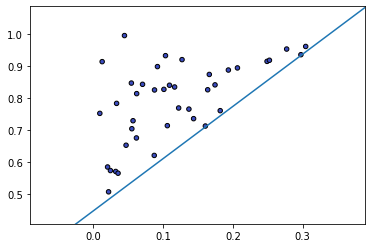

In [30]:
if np.std(y_right):
    wr = params_to_coef(X_right,  y_right)
else:
    wr = w
# print(f'level {level}, row {len(div_row)},right')
plot_lines_local(X_right,  y_right,wr)

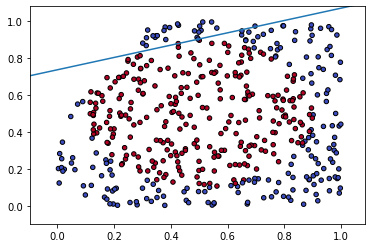

In [32]:
wl = params_to_coef(X_left, y_left)
# print(f'level {level}, row {len(div_row)},left')
plot_lines_local(X_left, y_left,wl)

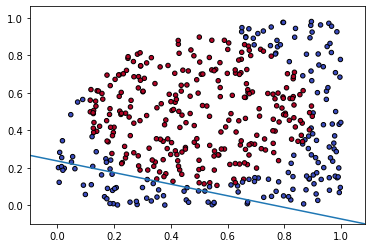

In [33]:

div = np.transpose(division(X_left, y_left,wl))
big_div = np.ones((1,len(y)))
X_left, y_left,  X_right,  y_right = smallify_dataset(X_left, y_left,div[:,0])
wl = params_to_coef(X_left, y_left)
# print(f'level {level}, row {len(div_row)},left')
plot_lines_local(X_left, y_left,wl)

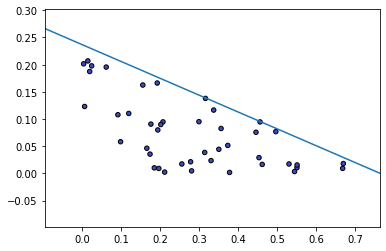

In [35]:
div = np.transpose(division(X_left, y_left,wl))
big_div = np.ones((1,len(y)))
X_left, y_left,  X_right,  y_right = smallify_dataset(X_left, y_left,div[:,0])
if np.std(y_left):
    wl = params_to_coef(X_left, y_left)

# print(f'level {level}, row {len(div_row)},left')
plot_lines_local(X_left, y_left,wl)